<a href="https://colab.research.google.com/github/anumit2004/Custom-PCA/blob/main/Build_Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"This is building Simple custom PCA Algorithm and applying it to various datasets."

# Principal Component Analysis (PCA)

## What is PCA?

Principal Component Analysis (PCA) is a **dimensionality reduction** technique that:

- Finds new directions (principal components) that **maximize variance**
- Projects data onto fewer dimensions while retaining as much information as possible
- Helps in **visualization**, **compression**, and **noise reduction**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

class MYPCA():
    '''
    PCA implementation.

    Let X be an m x n matrix:
      - m: number of samples
      - n: number of features
    '''

    def __init__(self, n_components_):
        self.n_components_ = n_components_

    def covariance_matrix(self, x):
        return np.cov(x.T)  # Covariance of features

    def fit(self, x):
        '''
        Step 1: Compute covariance matrix.
        Step 2: Compute eigenvalues and eigenvectors of the covariance matrix.
        Step 3: Sort eigenvalues and select the top k components.
        '''
        self.mean_ = np.mean(X, axis=0)
        x_centered = x - self.mean_
        cov_mat = self.covariance_matrix(x_centered)  # n x n

        # Step 1: Compute eigenvalues and eigenvectors using eigh (optimized for symmetric matrices)
        eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)  # better than eig

        # Step 2: Sort eigenvalues (and corresponding eigenvectors) in descending order
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_e_values = eigen_values[sorted_index]  # shape: (n,)
        sorted_e_vectors = eigen_vectors[:, sorted_index]  # shape: (n x n)

        # Step 3: Select the top k eigenvectors
        self.components_ = sorted_e_vectors[:, :self.n_components_]  # shape: (n x k)
        self.explained_variance_ = sorted_e_values[:self.n_components_]  # shape: (k,)
        self.explained_variance_ratio_ = np.sum(self.explained_variance_) / np.sum(eigen_values)

        return self

    def transform(self, x):
        '''
        Step 4: Project the data onto the top k principal components.
        '''
        x_centered = x - self.mean_
        return x_centered @ self.components_  # shape: (m x k)

    def inverse_transform(self, x_proj):
        '''
        Step 5: Reconstruct the original data (approximation) from reduced components.
        '''
        return x_proj @ self.components_.T + self.mean_ #shape(m x n)


#What is happening here ?
Let's break it down with a very simple dataset.

Let $ X $ be a data matrix of shape $ m \times n $, where:
- $ m $ is the number of samples (rows)
- $ n $ is the number of features (columns)

##Step 0: Create a small 2D dataset
```
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
])
```
##Step 1: Fit PCA to reduce from 2D to 1D

```
pca = MYPCA(n_components_=1)
pca.fit(X)
X_reduced = pca.transform(X)
```
---
## Step 2: Covariance Matrix and find the eigen values and eigen vetors.
---
### **Covariance Matrix**: Mathematical Formulation
####  ● Intermediary Step 1: Mean Centering

First, subtract the mean of each feature (column-wise):

$$
X_{\text{centered}} = X - \mu
$$

where $ \mu $ is the mean vector:

$
\mu_j = \frac{1}{m} \sum_{i=1}^m X_{ij}
$


#### ● Intermediary Step 2: Covariance Matrix Formula

The covariance matrix \( C \) is computed as:

$$
C = \frac{1}{m - 1} X_{\text{centered}}^T X_{\text{centered}}
$$
- Shape of \( C \) is $ n \times n $
- $ C_{ij} $ represents the covariance between feature \( i \) and feature \( j \)

Each element of the covariance matrix is given by:

$$
\text{Cov}(X_i, X_j) = \frac{1}{m - 1} \sum_{k=1}^m (X_{ki} - \bar{X}_i)(X_{kj} - \bar{X}_j)
$$


The whole matrix format is :
$$
C =
\begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1, X_2) & \cdots & \text{Cov}(X_1, X_n) \\
\text{Cov}(X_2, X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_n, X_1) & \text{Cov}(X_n, X_2) & \cdots & \text{Var}(X_n)
\end{bmatrix}
$$

- $ \text{Var}(X_i) $: Variance of feature \( X_i \)
- $ \text{Cov}(X_i, X_j) $: Covariance between features \( X_i \) and \( X_j \)
- The matrix is **symmetric**, so:
  $
  \text{Cov}(X_i, X_j) = \text{Cov}(X_j, X_i)
  $

---
## Intuition
- Diagonal entries: variances of individual features.
- Off-diagonal entries: measure how two features change together.
  - Positive → increase together.
  - Negative → one increases as the other decreases.

So, here the covarience matrix will be :
```
cov(X) = [[0.7825 0.785 ]
          [0.785  0.8967]]
```
And the eigen values and vectors associated with cov matrix is :
```
eigenvalues = [0.04908, 1.63016]
eigenvectors = [[-0.7351, -0.6779],
               [ 0.6780, -0.7351]]
```

### Step 3: Select Top k Components
Keep the eigenvector with the highest eigenvalue.
In k=1, we keep the direction of max variance.

Example:
```
Top eigenvector = [[-0.6779],
                   [ -0.7351]]

Explained variance ratio = 1.63016 / (1.63016 + 0.04908) ≈ 0.97
```
### Step 4: Project the Data
```
X_reduced = X @ top_eigenvector
```
Output:
```
X_reduced = [[-0.82797]
             [ 1.77758]
             [-0.9922 ]
             [-0.04258]]
```

Let test it .

At first we are testing very basic data to see what happens in PCA.

In [ ]:
# Generate simple 2D data
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [ ]:
# principal components
mean = np.mean(X, axis=0)
components = pca.components_
explained = pca.explained_variance_

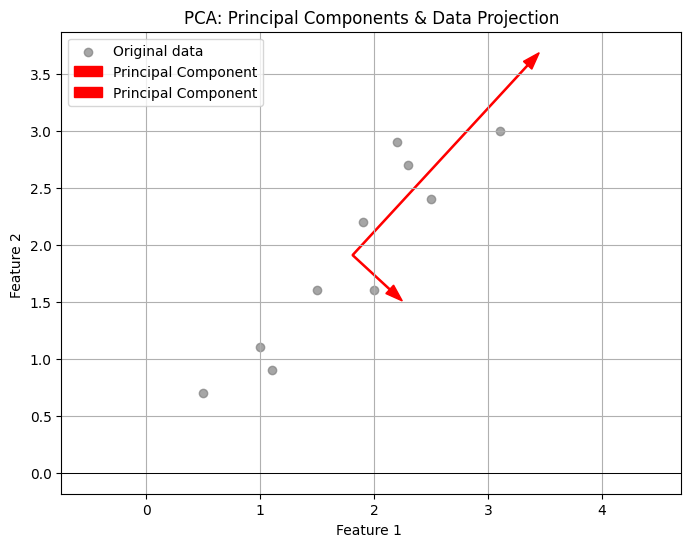

In [ ]:
# Draw the principal components
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, color='gray', label="Original data")

for length, vector in zip(explained, components):
    v = vector * 2 * np.sqrt(length)  # scale arrows
    plt.arrow(mean[0], mean[1], v[0], v[1],
              color='red', width=0.01, head_width=0.1, label='Principal Component')

plt.axhline(0, color='black', lw=0.7)
plt.title('PCA: Principal Components & Data Projection')
plt.xlabel('Feature 1 ')
plt.ylabel('Feature 2 ')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

Visulalizing **PCA** .

(300, 2)


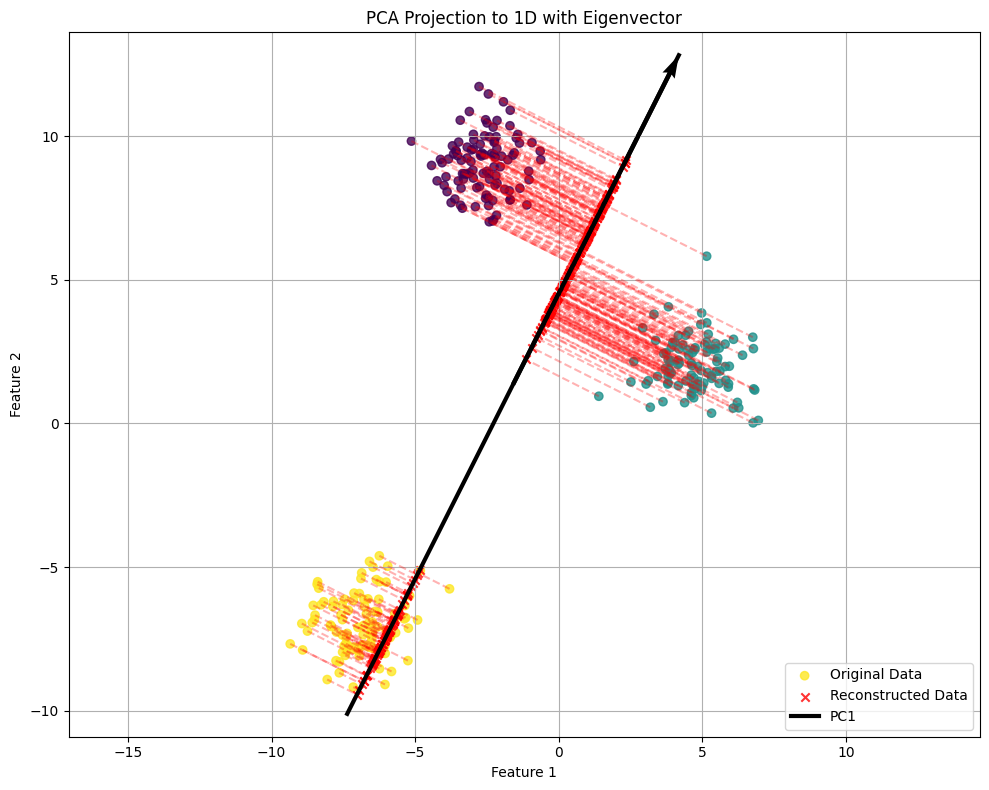

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, random_state=42)

pca = MYPCA(n_components_=1)
pca.fit(X)
X_proj = pca.transform(X)
X_reconstructed = pca.inverse_transform(X_proj)
print(X_reconstructed.shape)
mean = pca.mean_
vector = pca.components_[:,0]
scale = np.sqrt(pca.explained_variance_[0]) * 1.8

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y,marker='o', alpha=0.8, label='Original Data')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c='red', marker='x', alpha=0.8, label='Reconstructed Data')
for i in range(len(X)):
    plt.plot([X[i, 0], X_reconstructed[i, 0]],
            [X[i, 1], X_reconstructed[i, 1]],
            'r--', alpha=0.3)


# Line showing the full principal component direction
line_length = scale
x_vals = [mean[0] - vector[0]*line_length, mean[0] + vector[0]*line_length]
y_vals = [mean[1] - vector[1]*line_length, mean[1] + vector[1]*line_length]
plt.plot(x_vals, y_vals, color='black', linewidth=3, label='PC1')

#for arrow
plt.quiver( mean[0], mean[1],
           vector[0]*scale, vector[1]*scale,
           angles='xy', scale_units='xy', scale=1,
           color='black', width=0.005)

plt.title("PCA Projection to 1D with Eigenvector")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.axis('equal')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Now lets try with **IRIS data** .

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


In [ ]:
my_pca = MYPCA(n_components_ = 2).fit(X)

print('Components:\n', my_pca.components_)
print('Explained variance ratited o from scratch:\n', my_pca.explained_variance_ratio_)

X_proj = my_pca.transform(X)
print('Transformed data shape from scratch:', X_proj.shape)

Components:
 [[-0.36138659  0.65658877]
 [ 0.08452251  0.73016143]
 [-0.85667061 -0.17337266]
 [-0.3582892  -0.07548102]]
Explained variance ratited o from scratch:
 0.9776852063187949
Transformed data shape from scratch: (150, 2)


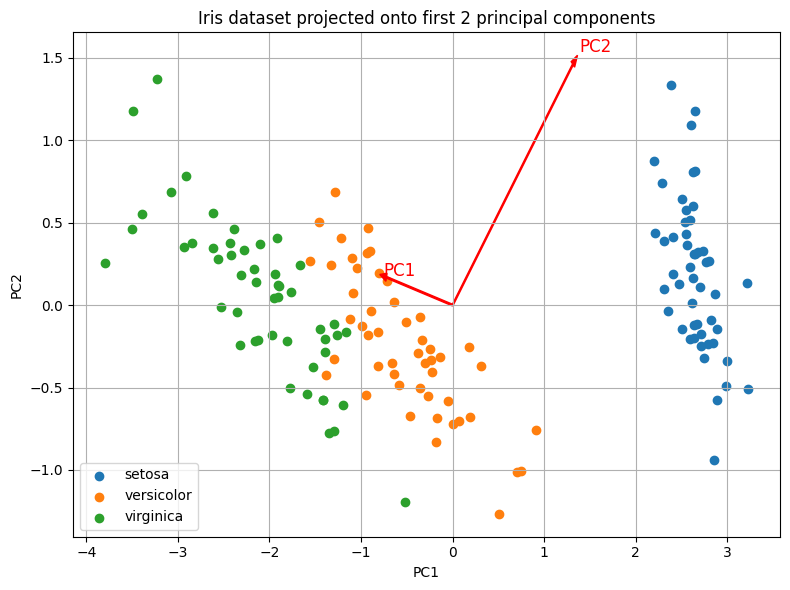

In [ ]:
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_proj[y == label, 0], X_proj[y == label, 1], label=iris.target_names[label])
# Plot eigenvectors as red arrows from the origin
origin = np.zeros(2)
for i in range(2):
    vector = my_pca.components_[:, i] * 2  # scale for visibility
    plt.arrow(origin[0], origin[1], vector[0], vector[1],
              color='red', width=0.01, head_width=0.05)
    plt.text(vector[0]*1.05, vector[1]*1.05, f'PC{i+1}', color='red', fontsize=12)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris dataset projected onto first 2 principal components")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Let test it with load_digits dataset .

In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the digits dataset
digits = load_digits()
X = digits.data  # shape: (1797, 64)
y = digits.target

# Standardize data to have zero mean and unit variance
X = StandardScaler().fit_transform(X)

In [ ]:
# Apply custom PCA
pca = MYPCA(n_components_=2)
pca.fit(X)
X_2d = pca.transform(X)

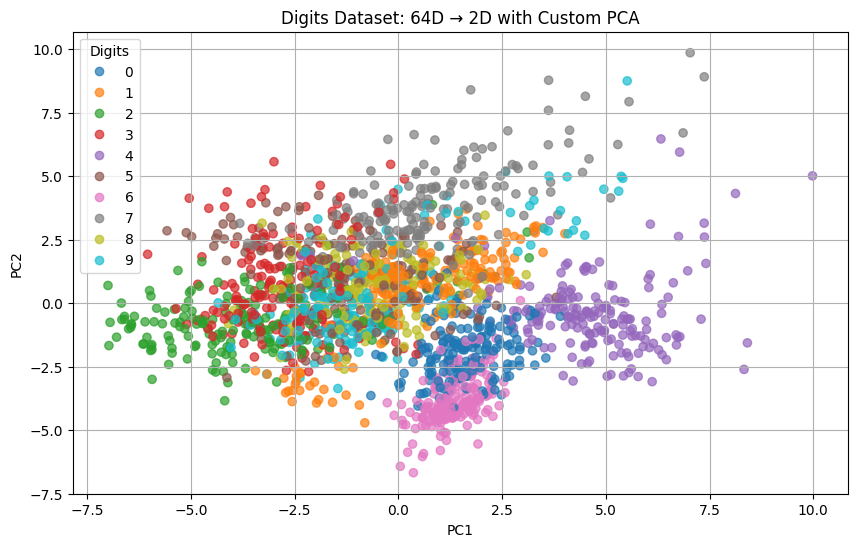

In [ ]:
# Plot 2D projection
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits Dataset: 64D → 2D with Custom PCA")
plt.grid(True)
plt.show()

In [ ]:
# Show explained variance ratio
print(f"Explained variance ratio (2 components): {pca.explained_variance_ratio_:.2%}")

Explained variance ratio (2 components): 21.59%


**Use more components for reconstruction**

In [ ]:
#more components
pca30 = MYPCA(n_components_=30)
pca30.fit(X)
X_proj = pca30.transform(X)
X_reconstructed = X_proj @ pca30.components_.T

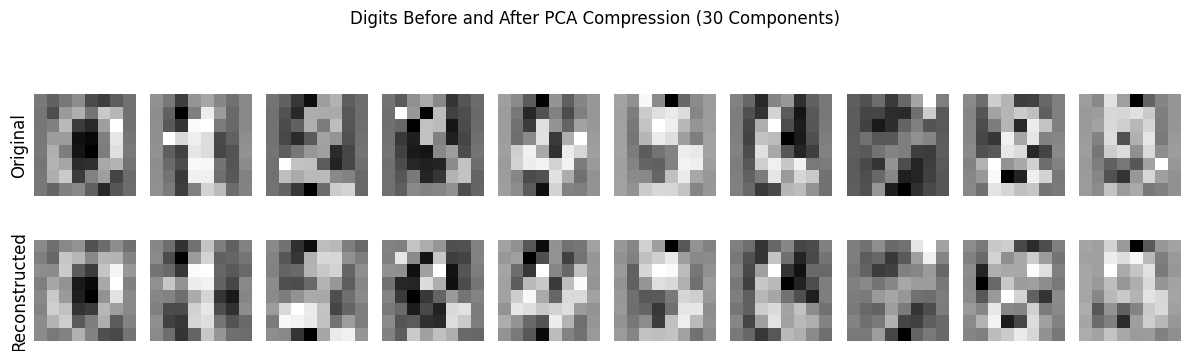

In [ ]:
# Show original vs reconstructed digits
fig, axes = plt.subplots(2,10 , figsize=(12, 4))
for i in range(10):
    axes[0, i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_reconstructed[i].reshape(8, 8), cmap='gray')
    axes[1, i].axis('off')
#for labels to be seen
axes[0, 0].set_axis_on()
axes[1, 0].set_axis_on()
axes[0, 0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[1, 0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Optionally also hide the spines (box edges around the image)
for spine in axes[0, 0].spines.values():
    spine.set_visible(False)
for spine in axes[1, 0].spines.values():
    spine.set_visible(False)

axes[0, 0].set_ylabel("Original", size='large')
axes[1, 0].set_ylabel("Reconstructed", size='large')
plt.suptitle("Digits Before and After PCA Compression (30 Components)")
plt.tight_layout()
plt.show()